### Q1.	
The pixels in an image are scanned from left to the right and from the top to the bottom. Each new pixel is predicted by the average of the pixel above and the one to the left. Let f and F represent the original and the predicted values, and e = f – F is the prediction error. The prediction error is quantized to “0”, “B”, or “-B” according to: 
  
Find the optimum weights while predicting the image such that mean square error is minimum.
Repeat the process if you use all nearest neighbor to predict the pixel value.
Repeat the process on any image of your choice

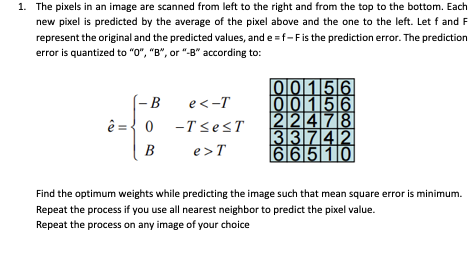

In [1]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

In [2]:
img = np.array([
    [0,0,1,5,6],
    [0,0,1,5,6],
    [2,2,4,7,8],
    [3,3,7,4,2],
    [6,6,5,1,0]
])

In [3]:
pad = np.pad(img,1)
pad

array([[0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 5, 6, 0],
       [0, 0, 0, 1, 5, 6, 0],
       [0, 2, 2, 4, 7, 8, 0],
       [0, 3, 3, 7, 4, 2, 0],
       [0, 6, 6, 5, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0]])

In [4]:
w = pad[1:-1, :-2]
e = pad[1:-1, 2: ]
n = pad[:-2 ,1:-1]
s = pad[2:  ,1:-1]

nw = pad[:-2, :-2]
ne = pad[:-2 , 2:]
se = pad[2: ,  2:]
sw = pad[2:,  :-2]

In [5]:
def average(arrays, weights):
    shape = arrays[0].shape
    out = np.zeros(shape)
    norm = np.sum(np.array(weights))
    for a,w in zip(arrays, weights):
        out += a*w/norm
    return out

In [6]:
def error(orig, pred, B=1, T=1):
    e = orig - pred
    r1 = e < -T
    r2a = -T <= e
    r2b = e <= T
    r3 = T < e
    e[r2a] = 0
    e[r2b] = 0
    e[r1] = -B
    e[r3] = B
    return e

In [7]:
def mse(arr):
    return np.mean(np.square(arr))

In [8]:
def find2optimum():
    x = []
    y = []
    for weight in np.arange(start=0, stop=1, step=0.01):
        pred = average([n,w], [weight, 1-weight])
        E = error(img, pred)
        e = mse(E)
        x.append(weight)
        y.append(e)
    plt.scatter(x,y)

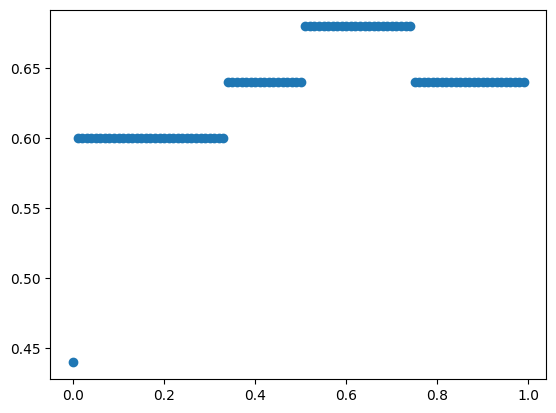

In [9]:
find2optimum()

## Result (left and top)
We obtain that the optimal weight is 0 for top and 1 for left. The MSE will be 0.4, taking B=1 and T=1

In [10]:
def find8optimum(start=0, stop=1, step=0.25):
    err_Arr = []
    weight_Arr = []
    for w1 in np.arange(start, stop, step):
        for w2 in np.arange(start, stop, step):
            for w3 in np.arange(start, stop, step):
                for w4 in np.arange(start, stop, step):
                    for w5 in np.arange(start, stop, step):
                        for w6 in np.arange(start, stop, step):
                            for w7 in np.arange(start, stop, step):
                                for w8 in np.arange(start, stop, step):
                                    pred = average([n, ne, e, se, s, sw, w, nw], [w1,w2,w3,w4,w5,w6,w7,w8])
                                    E = error(img, pred)
                                    err = mse(E)
                                    if not np.isnan(err):
                                        err_Arr.append(err)
                                        weight_Arr.append([w1,w2,w3,w4,w5,w6,w7,w8])
    min_idx = np.argmin(err_Arr)
    min_val = err_Arr[min_idx]
    min_weight = weight_Arr[min_idx]
    print(f"Minimum error is {min_val} with weights {min_weight}")

In [11]:
find8optimum(step=0.5)

Minimum error is 0.36 with weights [0.0, 0.0, 0.0, 0.0, 0.0, 0.5, 0.0, 0.0]


/var/folders/v_/7h9hf8f91m9cxmhg0xrmbstr0000gn/T/ipykernel_25892/2498859763.py:6: RuntimeWarning: invalid value encountered in divide
  out += a*w/norm


In [12]:
find8optimum(step=0.25)

/var/folders/v_/7h9hf8f91m9cxmhg0xrmbstr0000gn/T/ipykernel_25892/2498859763.py:6: RuntimeWarning: invalid value encountered in divide
  out += a*w/norm


Minimum error is 0.32 with weights [0.0, 0.0, 0.0, 0.0, 0.25, 0.0, 0.5, 0.0]


In [13]:
find8optimum(step=0.2)

/var/folders/v_/7h9hf8f91m9cxmhg0xrmbstr0000gn/T/ipykernel_25892/2498859763.py:6: RuntimeWarning: invalid value encountered in divide
  out += a*w/norm


Minimum error is 0.32 with weights [0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.4, 0.0]


In [14]:
find8optimum(step=0.15)

/var/folders/v_/7h9hf8f91m9cxmhg0xrmbstr0000gn/T/ipykernel_25892/2498859763.py:6: RuntimeWarning: invalid value encountered in divide
  out += a*w/norm


Minimum error is 0.32 with weights [0.0, 0.0, 0.0, 0.0, 0.15, 0.0, 0.3, 0.0]


## Result (all nearest neighbors)
Minimum error is 0.32 with weights [0.0, 0.0, 0.0, 0.0, 0.15, 0.0, 0.3, 0.0]